In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from datetime import datetime
import mplfinance as mpl
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import baostock as bs
import mplfinance as mpf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()
plt.rcParams['font.sans-serif']=['Microsoft Yahei']

/home/VENV36/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<div class="jumbotron">
    <p class="display-1 h1">量化交易策略</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 交易策略

<dl class="row text-danger">
    <dt class="col-md-4">交易策略</dt>
    <dd class="col-md-8">交易策略是交易员进行交易时遵循的交易规则</dd>
</dl>

## 量化交易策略的分类

<center><img src="./img/strategy/strategyType.png" width=100%></center>

## 趋势追踪策略

- 一旦市场形成下降（或上升）趋势后，就将沿着原方向运行

- 趋势策略的来源：
    - 市场并非有效，有限理性决策者对信息的解读和操作不同
    - 价格以趋势方式演变

### 趋势

<dl class="row">
    <dt class="col-md-2">趋势</dt>
    <dd class="col-md-10">价格<strong>高点</strong>和<strong>低点</strong>随时间的移动</dd>
</dl>

- 市场价格向着一个特定方向持续运动

<center><img src="./img/strategy/dow.jpg" width=80%></center>

Charles Dow

- 与Edward Jones合创Wall Street Journal
- 创立DJIA (Dow Jones Industrial Average)
- 与William P. Hamilton创立道氏理论（[the Dow Theory](https://www.investopedia.com/terms/d/dowtheory.asp)）

- 上升趋势(uptrends)：由不断**升高的高点**和不断**升高的低点**构成
- 下降趋势(downtrends)：由不断**降低的低点**和**不断降低的高点**构成
- 震荡(sideways)：当高点和低点没有上述变化规律的时候构成震荡，或称作“横向整理”

<center>
<img src="./img/strategy/updownsideways.png" width=50%>   
</center>

#### 获取并绘制沪深300指数历史日数据

In [41]:
bs.login()

login success!


In [47]:
hs300res = bs.query_history_k_data_plus('sh.000300',fields='date,open,high,low,close,volume',start_date='2019-01-01',end_date='2021-09-30',frequency='d')

In [12]:
def baostock2DataFrame(bsiter):
    rsLst = []
    while bsiter.error_code == '0' and bsiter.next():
        rsLst.append(bsiter.get_row_data())
    df = pd.DataFrame(rsLst,columns=bsiter.fields)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date',inplace=True)
    for each in df.columns:
        if df[each].dtypes == 'O':
            df[each] = df[each].astype('float')
    return df

In [48]:
hs300Df = baostock2DataFrame(hs300res)
hs300Df

,open,high,low,close,volume
date,,,,,
2019-01-02,3017.0670,3018.7750,2958.4880,2969.5350,6.866302e+09
2019-01-03,2963.0180,3000.4410,2953.2540,2964.8420,7.086710e+09
2019-01-04,2940.1910,3036.8140,2935.8290,3035.8740,1.033190e+10
2019-01-07,3055.1530,3061.7490,3035.9120,3054.3030,1.011644e+10
2019-01-08,3049.8740,3055.5100,3038.5330,3047.7030,8.617059e+09
...,...,...,...,...,...
2021-09-24,4845.6380,4897.0596,4838.5352,4849.4277,2.076933e+10
2021-09-27,4870.8482,4922.5626,4852.1997,4877.3698,2.159670e+10
2021-09-28,4869.0845,4901.3114,4846.6306,4883.8280,1.768909e+10


In [61]:
mc = mpf.make_marketcolors(up='r',down='g',inherit=True)
mystyle = mpf.make_mpf_style(marketcolors=mc)

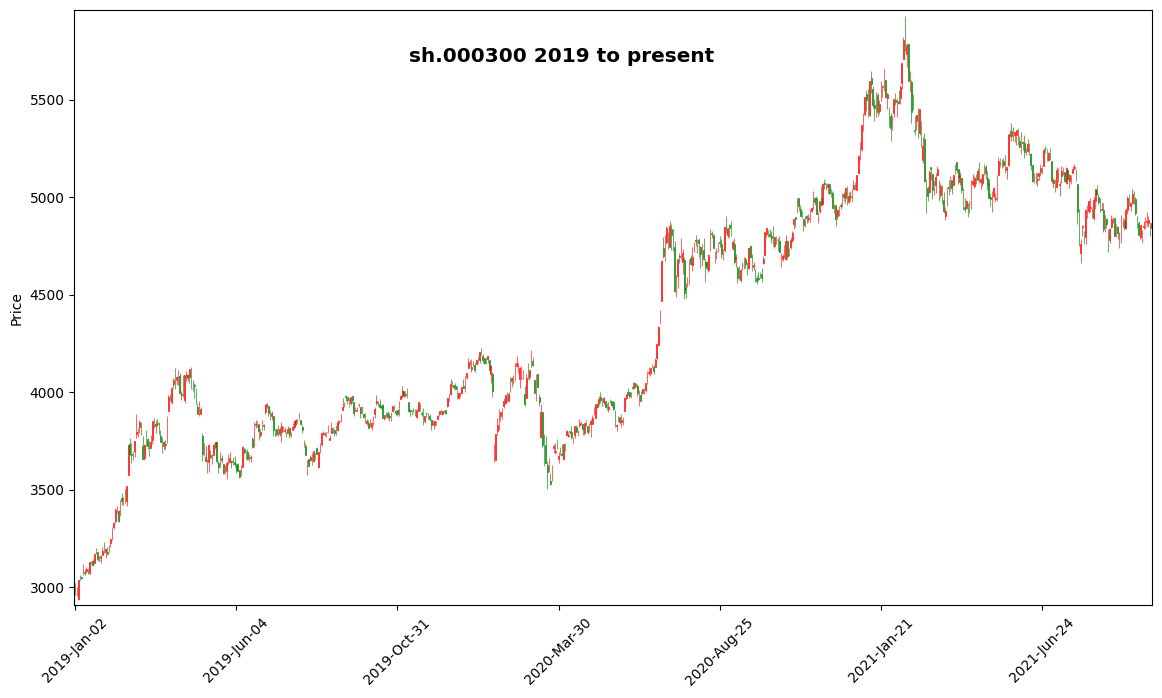

In [167]:
mpf.plot(hs300Df,type='candle',style=mystyle,volume=False,figratio=(18,10),figscale=1.2,tight_layout=True,title='sh.000300 2019 to present')

### 趋势判断方法

In [132]:
# 获取中国神华股票历史价格数据
shres = bs.query_history_k_data_plus('sh.601088',fields='date,open,high,low,close,volume',start_date='2021-01-01',end_date='2021-09-30',frequency='d')

In [133]:
shDf = baostock2DataFrame(shres)

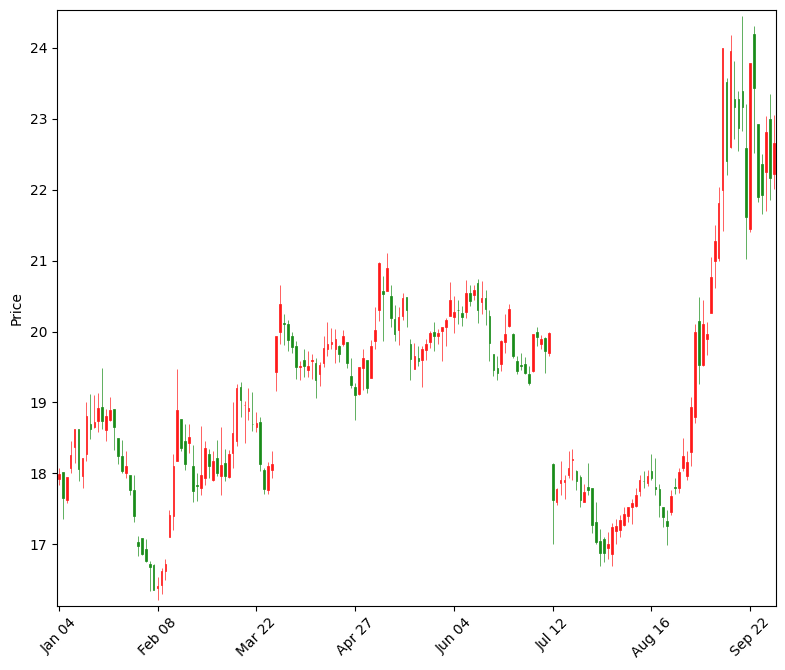

In [134]:
mpf.plot(shDf,type='candle',style=mystyle,volume=False,figratio=(12,10),figscale=1.2,tight_layout=True)

#### 趋势线

- 上升趋势线：上涨行情中两个以上**低点**的连线

- 下降趋势线：下跌行情中两个以上**高点**的连线

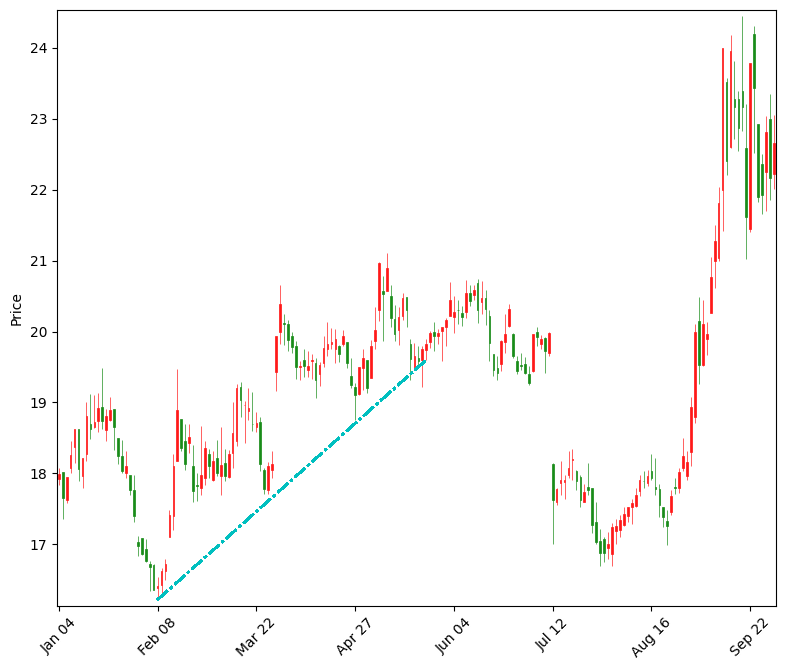

In [136]:
mytlines = dict(tlines=[('2021-02-08','2021-05-26')],tline_use='low',colors='c',linestyle='-.')
mpf.plot(shDf,type='candle',style=mystyle,volume=False,figratio=(12,10),figscale=1.2,tight_layout=True,tlines=mytlines)

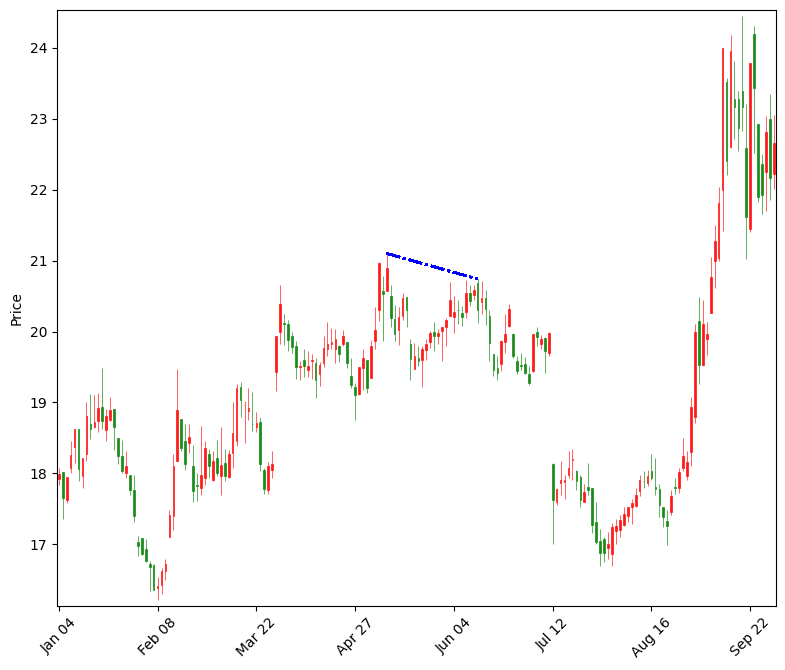

In [139]:
mytlines = dict(tlines=[('2021-05-12','2021-06-15')],tline_use='high',colors='b',linestyle='-.')
mpf.plot(shDf,type='candle',style=mystyle,volume=False,figratio=(12,10),figscale=1.2,tight_layout=True,tlines=mytlines)

#### 通道线

- 设置价格正常波动范围（通道），当价格突破该范围时，认为出现趋势

In [184]:
# 唐奇安通道（Donchian Channels）
window = 20   # 移动时间窗口

# 唐奇安通道上界
hs300Df['Upper'] = hs300Df['close'].rolling(window).max()
# 唐奇安通道下界
hs300Df['Lower'] = hs300Df['close'].rolling(window).min()
hs300Df

,open,high,low,close,volume,Upper,Lower
date,,,,,,,
2019-01-02,3017.0670,3018.7750,2958.4880,2969.5350,6.866302e+09,NaN,NaN
2019-01-03,2963.0180,3000.4410,2953.2540,2964.8420,7.086710e+09,NaN,NaN
2019-01-04,2940.1910,3036.8140,2935.8290,3035.8740,1.033190e+10,NaN,NaN
2019-01-07,3055.1530,3061.7490,3035.9120,3054.3030,1.011644e+10,NaN,NaN
2019-01-08,3049.8740,3055.5100,3038.5330,3047.7030,8.617059e+09,NaN,NaN
...,...,...,...,...,...,...,...
2021-09-24,4845.6380,4897.0596,4838.5352,4849.4277,2.076933e+10,5013.5219,4801.6094
2021-09-27,4870.8482,4922.5626,4852.1997,4877.3698,2.159670e+10,5013.5219,4805.6099
2021-09-28,4869.0845,4901.3114,4846.6306,4883.8280,1.768909e+10,5013.5219,4805.6099


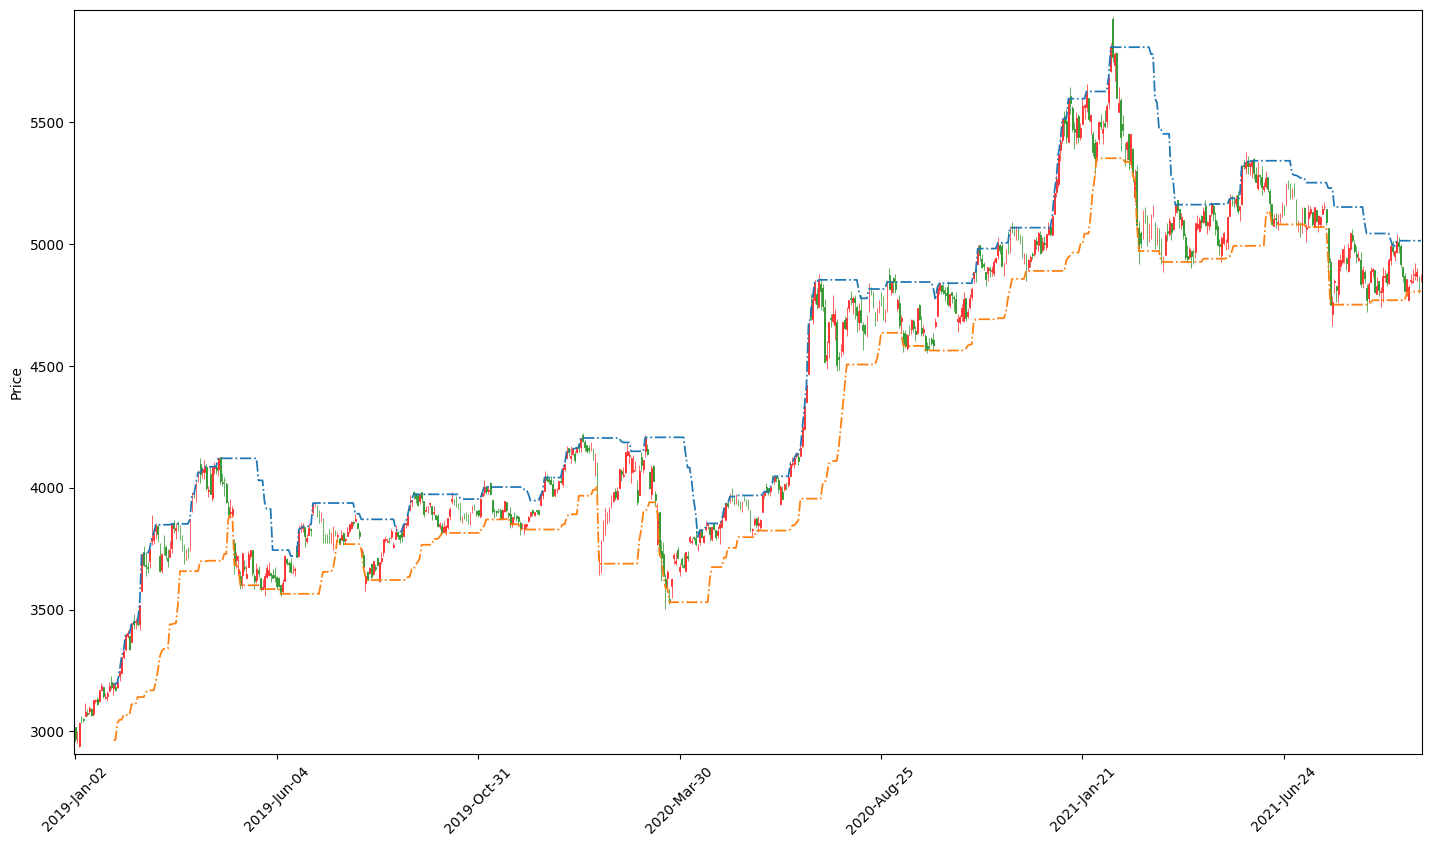

In [185]:
# 绘制布林线
bandsPlot = mpf.make_addplot(hs300Df[['Upper','Lower']],linestyle='-.')  # 添加额外图形
mpf.plot(hs300Df,type='candle',style=mystyle,figratio=(18,10),figscale=1.5,tight_layout=True,addplot=bandsPlot)

#### 移动平均线

- 通过价格的长短期移动平均线的相对位置判断趋势

In [143]:
aprice = web.DataReader('AAPL',start='2020-01-01',end='2021-09-30',data_source='stooq')
aprice.sort_index(inplace=True)
aprice.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,73.082,74.158,72.822,74.096,137461756
2020-01-03,73.308,74.153,73.147,73.378,148495441
2020-01-06,72.475,73.999,72.224,73.959,120164575
2020-01-07,73.969,74.233,73.390,73.615,113002090
2020-01-08,73.310,75.104,73.308,74.797,134134159


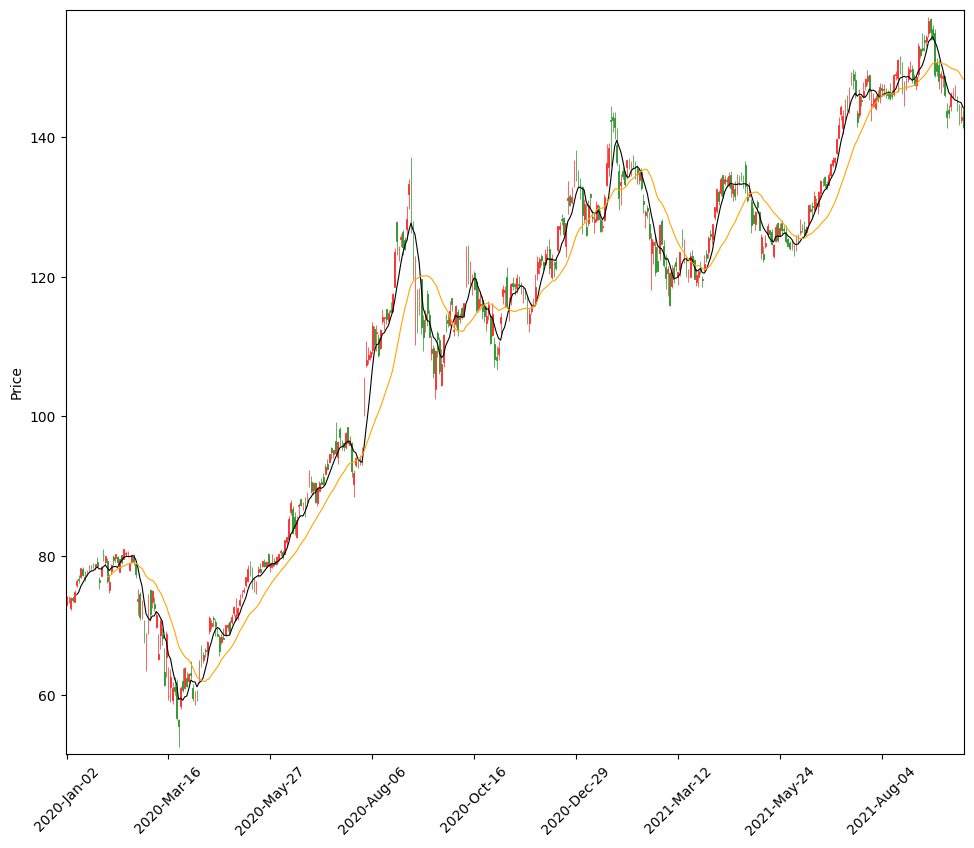

In [148]:
mystyle = mpf.make_mpf_style(marketcolors=mc,mavcolors=['k','orange'])
mpl.plot(aprice,type='candle',style=mystyle,mav=(6,21),figratio=(12,10),figscale=1.5,tight_layout=True)

- 金叉：短期均线**上穿**长期均线，买入位置

- 死叉：短期均线**下穿**长期均线，卖出（平仓）位置

## 统计套利

- 套利：一般指某种资产在一个或多个市场存在不同的价格时，在低价格市场买进，在高价格市场卖出，也被称作价差交易

- 套利分为
    - 无风险套利：利用资产在不同市场的价差套利
    - 有风险套利

### 统计套利的定义

<dl class="row text-info">
    <dt class="col-md-4">统计套利</dt>
    <dd class="col-md-8">根据统计学的原理，利用选取的两个或多个资产的<strong>统计规律</strong>建立量化模型的套利方法</dd>
</dl>

- 假设一个策略在$t$时刻的累积收益贴现值为$v(t)$，若满足下述四个条件，则该策略是统计套利策略：
$$
\begin{split}
    (1)\quad & v(0)=0 \quad\text{零初始成本}\\
    (2)\quad & \underset{t\to\infty}{\lim}E[v(t)]>0 \quad\text{正的期望贴现收益}\\
    (3)\quad & \underset{t\to\infty}{\lim}P[v(t)<0]=0 \quad\text{策略亏损的概率在时间趋向无穷的时候趋近于0}\\
    (4)\quad & 若\forall t<\infty, P[v(t)<0]>0, 则\underset{t\to\infty}{\lim}\frac{\text{var}[v(t)]}{t}=0 \quad\text{在有限时间内，如果损失概率没有趋近于0，则经时间平均后的方差趋近于0}
\end{split}
$$

- 统计套利是零初始成本(initial zero cost)、自融资(self-financing)的策略
    - 自融资策略：策略所产生的资产组合的价值变化完全是由交易的盈亏引起的，而不是另外增加现金投入或现金支出。

- 统计套利与无风险套利的区别：统计套利在某个时间内是**可能发生亏损**的

### 统计套利的类型

- 跨期统计套利
- 跨市场统计套利
- 跨品种统计套利

### 跨期统计套利

- 利用同种商品的不同到期月份的期货合约之间出现的**异常价差**，做空价格高估的合约，**同时**做多价格低估的合约，等价差回归到正常水平的时候平仓获利

- 跨期套利的来源：**季节性波动**，后者又是由于商品**供需**的季节性变化导致

### 跨市场统计套利

- 在不同市场，具有相同标的资产之间进行的套利

- 期现套利，当**期货市场**与**现货市场**在价格上出现差距，利用价格差距，低买高卖而获利

- 期现套利的来源：基差偏离持有成本
    - 基差(spread)$=$现货价格$-$期货价格

<center><img src="./img/strategy/spotfutures.jpg" width=100%></center>

##### 正向市场套利

<dl class="row">
    <dt class="col-md-4">正向市场(contango)</dt>
    <dd class="col-md-8">期货价格大于现货价格</dd>
</dl>

- **买入**现货的同时**卖出同等数量**的期货，等期现价差收敛时平掉套利头寸

##### 反向市场套利

<dl class="row">
    <dt class="col-md-4">反向市场(backwardation)</dt>
    <dd class="col-md-8">期货价格小于现货价格</dd>
</dl>

- **卖出**现货的同时**买入同等数量**的期货

### 跨品种套利

- 利用同一市场上的两种具有**高度相关性**的标的资产之间的价差进行套利

- 跨品种套利来源：两种资产的价差偏离它们之间的长期均衡关系

#### 如何选择跨品种套利

- 选择产品与原材料
    - 例如，螺纹钢与铁矿石、焦炭，生产$1$吨生铁需要$1.5\sim2$吨铁矿石和$0.4\sim0.6$吨焦炭
    - 例如，1吨大豆生产出0.2吨豆油及0.8吨豆粕

- 选择替代品
    - 例如，豆油、棕榈油、菜籽油

#### 如何判断两个产品之间具有相关性？

In [149]:
aprice = web.DataReader('AAPL',data_source='stooq',start='2018-01-01',end='2021-09-30')
aprice.head()
aprice.shape

,Open,High,Low,Close,Volume
Date,,,,,
2021-09-30,143.66,144.3780,141.28,141.50,89056664
2021-09-29,142.47,144.4500,142.03,142.83,74602044
2021-09-28,143.25,144.7500,141.69,141.91,108972340
2021-09-27,145.47,145.9600,143.82,145.37,74150729
2021-09-24,145.66,147.4701,145.56,146.92,53477869


(944, 5)

In [150]:
aprice.sort_index(inplace=True)
y = aprice['Close'][0]
ranData = []
for each in range(aprice.shape[0]):
    ranData.append(y+np.random.normal(aprice['Close'].diff().mean(),aprice['Close'].diff().std()))
    y = ranData[-1]
priceData = pd.DataFrame({'x':sorted(aprice['Close']),'y':ranData})
priceData

,x,y
0,34.559,44.036147
1,35.688,46.462537
2,35.951,47.810129
3,36.034,47.179825
4,36.460,50.068468
...,...,...
939,153.650,200.679647
940,154.070,200.463647
941,154.300,201.790791
942,155.110,200.539216


In [157]:
aprice['y']=ranData
aprice

,Open,High,Low,Close,Volume,y
Date,,,,,,
2018-01-02,40.746,41.2560,40.529,41.247,106573277,44.036147
2018-01-03,41.312,41.7930,41.173,41.240,123057901,46.462537
2018-01-04,41.314,41.5410,41.203,41.436,93332866,47.810129
2018-01-05,41.533,41.9950,41.442,41.902,98542881,47.179825
2018-01-08,41.749,42.0510,41.651,41.759,85738348,50.068468
...,...,...,...,...,...,...
2021-09-24,145.660,147.4701,145.560,146.920,53477869,200.679647
2021-09-27,145.470,145.9600,143.820,145.370,74150729,200.463647
2021-09-28,143.250,144.7500,141.690,141.910,108972340,201.790791


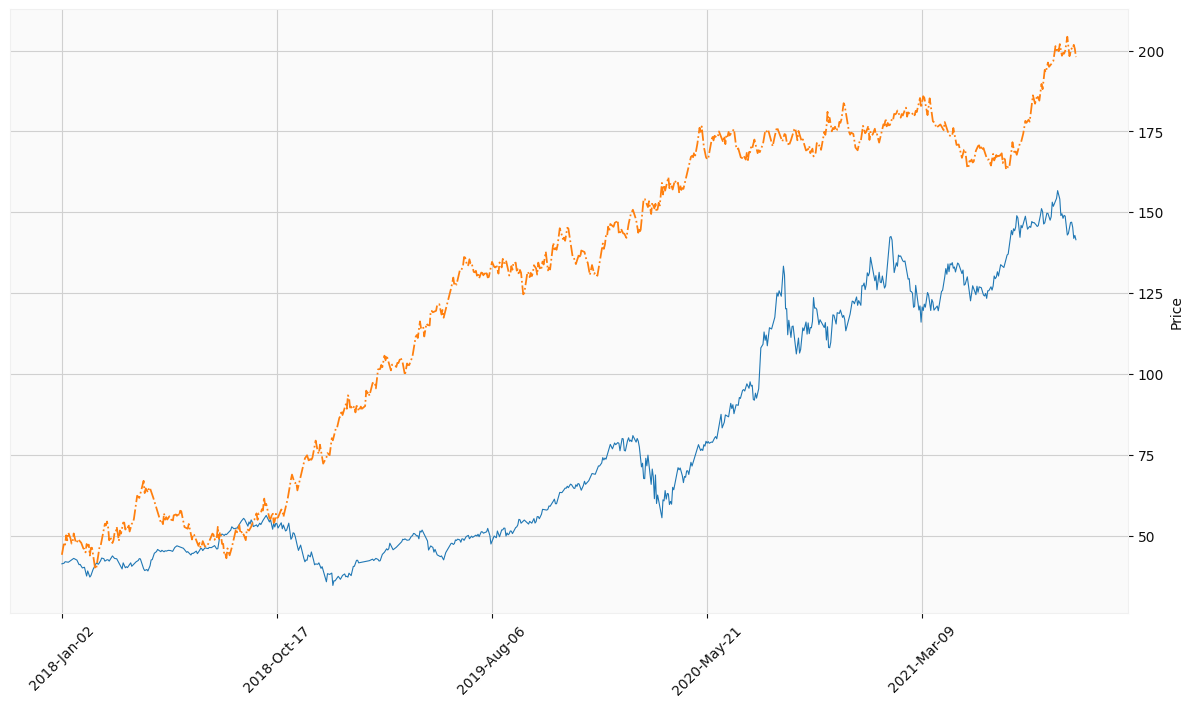

In [166]:
addedPlot = mpf.make_addplot(aprice['y'],linestyle='-.')
mpf.plot(aprice,type='line',style='yahoo',figratio=(18,10),figscale=1.5,addplot=addedPlot)

- 利用回归分析计算两个产品价格之间的相关性？

In [152]:
priceData.head()
priceData.corr()      # pandas的DataFrame计算相关系数

,x,y
0,34.559,44.036147
1,35.688,46.462537
2,35.951,47.810129
3,36.034,47.179825
4,36.460,50.068468


,x,y
x,1.000000,0.854213
y,0.854213,1.000000


##### 简单回归分析

```python
pip install statsmodels
# Python中的统计模块
import statsmodels.formula.api as smf
```

In [153]:
res = smf.ols('y~x',data=priceData).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     2543.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):          7.91e-270
Time:                        20:02:30   Log-Likelihood:                -4408.3
No. Observations:                 944   AIC:                             8821.
Df Residuals:                     942   BIC:                             8830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3038      1.964     18.990      0.000      33.449      41.159
x              1.1478      0.023     50.426      0.000       1.103       1.192
==============================================================================
Omnibus:                    82651.653   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.078
Skew:                           0.046   Prob(JB):                     8.21e-17
Kurtosis:                       1.631   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- “伪回归”(spurious regression)
    - 自变量和因变量之间表现出较强的相关性，但事实上二者没有关联

<center><img src="./img/strategy/spuriousReg.png" width=60%></center>

#### 协整分析

平稳（时间）序列是包括均值、方差和自相关等在内的统计特性不随时间发生变化的时间序列。
非平稳序列数据可能包含趋势（trend）、季节性（seasonality)，或者随机游走（random walk）。
随机游走是一种随机过程，每个时刻的数据只跟前一个数据和各自的随机误差有关。
几乎所有的原始价格时间序列数据都是非平稳的。

<dl class="row">
    <dt class="col-md-4">协整(cointegration)</dt>
    <dd class="col-md-8">两个时间序列各自都是<strong>非平稳过程</strong>，但是它们的线性组合是<strong>平稳过程</strong></dd>
</dl>

<dl class="row">
    <dt class="col-md-4">平稳过程</dt>
    <dd class="col-md-8">统计特性在时间平移下不变的随机过程</dd>
</dl>

- 假设有一个时间序列$\{X_t\}$，则该序列是平稳过程需要满足下面的条件：


1. $E[X_t] = \mu$
2. $Var[X_t] = \sigma^2$
3. $Cov(X_t, X_{t+k}) = r(k)$

<center><img src="./img/strategy/stationary.png" width=60%></center>

##### 检验协整关系

- 设有两个时间序列$\{X_t\}$ 和 $\{Y_t\}$,


1. 利用最小二乘（OLS）法估计$X_t$ 和 $Y_t$ 的长期均衡关系式$Y_t=\alpha_0+\alpha_1X_t+e_t$，并计算误差：
\begin{align}
  \hat{Y}_t &= \hat{\alpha}_0 + \hat{\alpha}_1 X_t \\
  \hat{e}_t &= Y_t - \hat{Y}_t \\
\end{align}

2. 检验残差序列$\{\hat{e}_t\}$的平稳性。可用ADF检验，如果通过检验，说明$X_t$ 和 $Y_t$具有协整关系。

- 螺纹钢（rb）与焦炭(j)关系

<center><img src="./img/strategy/cointegration.png" width=100%></center>

### 高频交易

高频交易主要是通过在极短的市场变化中进行买卖，从而获利，代表是西蒙斯的文艺复兴科技公司。

- 统计套利。通过数学统计的方法发现那些成功概率比较高的机会。比如我们发现两只食品股票的走势常年基本保持一致，就可以设置一个偏离率来进行买卖，大于某个值就买，回到正常范围内就卖出，通过计算机技术，系统可以同时统计数千只股票的偏离率，从而获利。
- 时间套利。需要掌握一定的爬虫技术和自然语言处理技术。同样一则消息人类阅读是比较慢的，而计算机阅读就可以在毫秒之间进行判断，谁第一时间掌握了消息，谁就更有机会获得收益。
- 低延迟策略。需要物理专业和通信工程的知识。国外的一些基金公司甚至利用微波来代替传统的独立光纤，因为微波在空气中的传播速度，相较于真空中的光速只慢了1%，而光在光纤中的传播速度却要减慢30%左右。

# 量化交易策略的组成

<center><img src="./img/strategy/strategyComp.png" width=100%></center>

## 交易标的

<dl class="row">
    <dt class="col-lg-4">交易标的</dt>
    <dd class="col-lg-8">应当买卖哪些产品</dd>
</dl>

- 只交易少数几个产品?
- 交易全部产品？

<center><img src="./img/strategy/rbContracts.png"  width=100%></center>

- 对于每个品种，最好交易**主力**合约

<center><img src="./img/strategy/majorContracts.png" width=100% /></center>

- 在所有主力合约中，最好选择**成交量**最大的

##### 如何选择交易标的？

- 选择交易标的的原则
> 选择交易**活跃**（成交量大）的品种合约

- 设定投资组合
    - 总有某个市场或某些产品出现趋势
    - 有些交易不明朗的市场或产品可以先观望
    - 当一些突发事件造成市场波动时，可以对冲风险

## 头寸规模

<dl class="row">
    <dt class="col-md-4">头寸规模</dt>
    <dd class="col-md-8">应当持有的交易标的的数量</dd>
</dl>

### 决定头寸规模的因素

- 可用资金量
    + **全仓**：用全部可用资金购入交易标的
    + **半仓**：用一半资金购入交易标的

- 交易标的的价格

- 市场的波动幅度
    - 波动**强**的市场，头寸规模适当**减小**
    - 波动**弱**的市场，头寸规模适当**增大**

买卖多少是交易中最重要的一个方面。大多数交易新手在单项交易中冒太大
的风险，即使他们拥有其他方面有效的交易风格，这也大大增加了他们破产的机
会。

## 入场信号

<dl class="row">
    <dt class="col-md-4">入场信号</dt>
    <dd class="col-md-8">决定何时开始建仓（加仓）的信号</dd>
</dl>

### 信号的含义

- 趋势交易策略：价格形成**突破**

- 统计套利策略：价格差出现**异常**

### 入场信号包含两种情形

- 初次建立仓位
    - 趋势交易策略：技术分析指标
    - 统计套利策略：价格差超过稳定阈值

- 加仓
    - 盈利加仓？亏损加仓？

- 盈利加仓

<center><img src="./img/strategy/winAdd.png" width=100% /></center>

- 亏损加仓

<center><img src="./img/strategy/lossAdd.png" width=100%/></center>

- 程序化交易的入市信号是由交易策略产生的

自动运行的系统产生入市信号，这些信号说明了进入市场买卖的明确的价位和市场条件。

## 离场信号

<dl class="row">
    <dt class="col-md-4">离场信号</dt>
    <dd class="col-md-8">决定何时平调持有的头寸</dd>
</dl>

- 离场信号包含
    - 止盈
    - 止损

### 止盈

> 决定何时平掉持有的盈利头寸

- 是否有必要止盈？

#### 止盈时机的选择

- 过早止盈：不能赚满整个趋势

<center><img src="./img/strategy/earlyWinExit.png" width=100% /></center>

- 过晚止盈：不能保住已经赚取的利润

<center><img src="./img/strategy/lateWinExit.png" width=100% /></center>

### 止损

> 决定何时平掉持有的亏损头寸

- 止损是在建立头寸之前，**预先**确定退出的价格位置

- 如果市场的波动触及止损价位，必须**每一次都毫无例外**退出

<center><img src="./img/strategy/stopLoss.png" width=100%></center>

长期来看，不会止住亏损的交易员不会取得成功。关于止亏，最重要的是在
你建立头寸之前预先设定退出的点位。

# “海龟”交易策略

## 背景

> 伟大的交易员是天生造就还是后天培养的?


<center> <img src="./img/strategy/richard_dennis.jpg" width=40%> </center>

Richard Dennis是一个成功的交易员，他在1980年左右已经将他不到5000$的初始投资变成了1亿。
他的合作伙伴William Eckhardt认为他的成功来自于他作为一个交易员的天分。
但是Dennis不这样认为，他认为他的交易是建立在一套交易法则基础上的，任何人掌握了这套交易法则，将能够复制他的成功。
最后他们决定做个实验来证实到底谁是对的。

他们在《巴伦氏》、《华尔街期刊》和《纽约时报》上刊登了大幅广告，招聘交易学员。
因为Richard或许是当时世界上最著名的交易员，所以有1000 多位申请人前来投奔他。他会见了其中的 80 位。
这一群人精选出 13 个人。1983 年 12 月底，学员们
被邀请到芝加哥进行两周的培训，到 1984 年 1 月初，学员们开始用小帐户进行交
易。到了 2 月初，Richard给其中的大多数人提供了 50 万$\sim$ 200 万美元的资金帐户。


- 从1000名报名者中挑选出13人
- 1983 年 12 月底，学员们被邀请到芝加哥进行两周的培训
- 1984 年初，Richard给其中的大多数人提供了 50 万$\sim$ 200 万美元的资金帐用于交易
- 学员们被称为“海龟”
- 在随后的四年中海龟们取得了年均复利80%的收益


学员们被称为“海龟”，因为Dennis相信他可以迅速的培养出交易员，就像新加坡的海龟培养员能迅速高效的培养出海龟一样。
Dennis教授这些海龟们依靠科学的方法进行交易，以减少交易对心理的冲击，因为心理的脆弱最可能使得人们犯错误从而损失惨重。
海龟成为交易史上最著名的实验，因为在随后的四年中海龟们取得了年均复利80%的收益。

> Denniss证明了交易可以被传授。他证明了用一套简单的法则，他可以仅有很少或根本没有交易经验的人成为优秀的交易员。

## 交易产品

- 芝加哥期货交易所（CBOT）    
    - 30 年期美国长期国债（Treasury Bond）、10 年期美国中期国库券（Treasury Note）
- 纽约咖啡可可与原糖交易所（NYCSC）    
    - 咖啡、可可、原糖、棉花
- 芝加哥商品交易所（CME）    
    - 瑞士法郎、德国马克、英镑、法国法郎、日圆、加拿大元、标准普尔500股票指数、欧洲美元、天美国短期国库券（Treasury Bill）  
- 纽约商品期货交易所（COMEX）    
    - 黄金、白银、铜  
- 纽约商业期货交易所（NYMEX）    
    - 原油、燃油、无铅汽油 

## 头寸规模

### 单位建仓量

- 计算当日实际波动范围（TR, True Range）：  
  $$ \text{TR} = \max\{\text{H}-\text{L}, \lvert\text{H}-\text{PDC}\rvert, \lvert\text{PDC}-\text{L}\rvert\} $$
  其中：  H——当日最高价，L——当日最低价，PDC——前个交易日的收盘价

<center><img src="./img/strategy/atr1.png" width=80%></center>

- 计算 ATR (TR的20日平均）：  
  $$ \text{ATR}_t = (19\times\text{ATR}_{t-1} + \text{TR})/20  $$ 
  其中：TR——当日的实际波动范围 

<center><img src="./img/strategy/atr.png" width=100%></center>

- 计算单位建仓量

   $$ \text{1个建仓单位} = \frac{\text{帐户资金金额的}1\%}{\text{ATR}\times\text{每点价值量}} $$ 

<dl class="row">
    <dt class="col-md-3">每点价值量</dt>
    <dd class="col-md-9">1手合约每变动一个基点，整个合约变动的价格</dd>
</dl>

$$每点价值量=最小变动价位\times交易单位（乘数）$$

类型|最小变动价位|交易单位|每点价值量
---|---|---|---
期货|0.2元/吨|100吨/手|20元/手
股票|0.01元/股|100股/手|1元/手

### 最大头寸限制

<center>

级别|类型|最大单位
---|---|---   
1|单一市场|4个单位
2|高度相关市场|6个单位
3|低度相关市场|10个单位  
4|单向交易（多头或空头）|12个单位
    
</center>

## 入市时机

> 以唐奇安通道(Donchian’s channel)突破作为入市时机

<dl class="row"> 
    <dt class="col-md-4">唐奇安通道</dt>
    <dd class="col-md-8">特定天数内的最高价和最低价组成的通道</dd>
</dl>

<center><img src="./img/strategy/donchian.png" width=100%></center>

- 上线=$\max（前T个交易日的最高价）$
- 下线=$\min（前T个交易日的最低价）$
- 中线=（上线+下线）/2

- $T=20$，每个交易日结束之后更新当天的数据

### 初始建仓

- 如果当前价格<font color="red"><strong>涨过</strong></font>了前20日的<font color="red"><strong>最高价</strong></font>，建立1个单位**多头**寸
- 如果当前价格<font color="green"><strong>跌过</strong></font>了前20日的<font color="green"><strong>最低价</strong></font>，建立1个单位**空头**寸。

> 在日间**突破发生时**进行交易，而不会等到每日收盘或次日开盘

##### 读取螺纹钢日交易数据

In [3]:
rbDaily = pd.read_csv('./data/strategy/rbDaily.csv')
rbDaily.head()
rbDaily.shape

,ActionDay,Close,High,Low
0,20160104,1775,1806,1773
1,20160105,1779,1790,1761
2,20160106,1783,1786,1766
3,20160107,1772,1786,1747
4,20160108,1752,1775,1750


(1150, 4)

##### 计算TR

In [4]:
for idx, row in rbDaily.iterrows():
    if idx == 0:
        rbDaily.loc[idx,'TR'] = row['High'] - row['Low']
    else:
        rbDaily.loc[idx,'TR'] = max(row['High'] - row['Low'],np.abs(rbDaily.loc[idx-1,'Close']-row['High']),np.abs(rbDaily.loc[idx-1,'Close']-row['Low']))
rbDaily.tail()

,ActionDay,Close,High,Low,TR
1145,20200826,3787,3793,3771,22.0
1146,20200827,3768,3796,3761,35.0
1147,20200828,3787,3789,3766,23.0
1148,20200831,3815,3829,3793,42.0
1149,20200901,3774,3818,3769,49.0


##### 计算ATR

In [5]:
rbDaily.loc[19,'ATR'] = rbDaily.loc[:20,'TR'].sum()/20
for idx, row in rbDaily.iterrows():
    if idx > 19:
        rbDaily.loc[idx,'ATR'] = (19*rbDaily.loc[idx-1,'ATR']+row['TR'])/20

rbDaily.head(30)

,ActionDay,Close,High,Low,TR,ATR
0,20160104,1775,1806,1773,33.0,NaN
1,20160105,1779,1790,1761,29.0,NaN
2,20160106,1783,1786,1766,20.0,NaN
3,20160107,1772,1786,1747,39.0,NaN
4,20160108,1752,1775,1750,25.0,NaN
5,20160109,1754,1756,1748,8.0,NaN
6,20160111,1753,1772,1750,22.0,NaN
7,20160112,1744,1759,1735,24.0,NaN
8,20160113,1740,1748,1736,12.0,NaN
9,20160114,1773,1777,1732,45.0,NaN


##### 计算单位头寸

In [110]:
rbDaily.tail()

,ActionDay,Close,High,Low,TR,ATR
1145,20200826,3787,3793,3771,22.0,46.155819
1146,20200827,3768,3796,3761,35.0,45.598028
1147,20200828,3787,3789,3766,23.0,44.468126
1148,20200831,3815,3829,3793,42.0,44.344720
1149,20200901,3774,3818,3769,49.0,44.577484


In [116]:
rawUnit = 1000000*0.01/(rbDaily.loc[1145,'ATR']*10)
rawUnit

21.665740746075873

In [117]:
unit = np.floor(rawUnit)
unit

21.0

### 加仓 

- 在上一次实际成交价格的基础上，以$\frac{1}{2}$ATR的间隔增加头寸

- 假设rb的建仓价格为3800，ATR=46
    - 第1个单位头寸的建仓价：$3800$
    - 第2个单位头寸的建仓价：$3800+1/2*46=3823$
    - 第3个单位头寸的建仓价：$3823+1/2*46=3846$
    - 第4个单位头寸的建仓价：$3846+1/2*46=3869$

## 离场时机

### 止损

> 以头寸风险为基础设置止损，任何一笔交易都不能出现 2%以上的风险

- 因为1个ATR对应的价格波动代表1%的账户权益，因此2%的风险对应价格相对于建仓方向反向波动**2个ATR**

- 例如，在3800元/吨建立第一个单位的rb头寸，则止损价位为：
    - $3800-2\times 46=3708$

> 海龟系统的止损能够适应市场的波动性

- 加仓之后，前面仓位的止损价格增加$\frac{1}{2}$ATR，导致所有仓位的止损价格距离最近加仓价格的距离为2ATR

<center><img src="./img/strategy/stopLevel.png" width=80%></center>

### 止盈

- 如果持有多头头寸，则当价格跌破 10 日最低价的时候离场
- 如果持有空头头寸，则当价格涨过10 日最高价的时候离场

## 伪代码

- 初始建多仓

```python
if min_close > don20_High + 1/2*atr and long_position = []:
    order_buy(price=market_price, volume=unit)
    long_position.append(unit)
    long_price_list.append(market_price)
    long_stop_loss_list.append(market_price-2*atr)
```

- 初始建空仓

```python
if min_close < don20_Low - 1/2*atr and short_position = []:
    order_sell(price=market_price, volume=unit)
    short_position.append(unit)
    short_price_list.append(market_price)
    short_stop_loss_list.append(market_price+2*atr)
```

- 加多仓

```python
if min_close > long_price_list[-1]+1/2*atr and long_position:
    order_buy(price=market_price, volume=unit)
    long_position.append(unit)
    long_price_list.append(market_price)

    # 更新止损位置
    for idx,_ in enumerate(long_stop_loss_list):
        long_stop_loss_list[idx] += 1/2*atr
    long_stop_loss_list.append(market_price-2*atr)
```

- 加空仓

```python
if min_close < short_price_list[-1]-1/2*atr and short_position:
    order_sell(price=market_price, volume=unit)
    sell_position.append(unit)
    sell_price_list.append(market_price)

    # 更新止损位置
    for idx,_ in enumerate(short_stop_loss_list):
        short_stop_loss_list[idx] -= 1/2*atr
    short_stop_loss_list.append(market_price+2*atr)
```

- 止盈平多仓

```python
if min_close < don10_Low and long_position:
    order_sell(price=market_price,volume=sum(long_position))
    long_position = []
    long_price_list = []
    long_stop_loss_list = []
```

- 止盈平空仓

```python
if min_close > don10_High and short_position:
    order_buy(price=market_price,volume=sum(short_position))
    short_position = []
    short_price_list = []
    short_stop_loss_list = []
```

- 多仓止损

```python
for idx, each in enumerate(long_stop_loss_list):
    if min_close < each:
        order_sell(price=market_price,volume=long_position[idx])
        long_position.pop()
        long_price_list.pop()
```

- 空仓止损

```python
for idx, each in enumerate(short_stop_loss_list):
    if min_close > each:
        order_buy(price=market_price,volume=short_position[idx])
        short_position.pop()
        short_price_list.pop()
```

海龟交易系统是一个完整的交易系统，它包括了交易的各个方面，实际上没
有给交易员留下一点主观想象决策的余地。
海龟策略从本质上讲是一个趋势跟随模型，通过唐安奇通道等突破方法确定入场和离场信号。海龟交易法则与其说是策略，不如说是一套系统，它不仅决定买卖什么、买卖多少、什么时候买卖、什么时候止损，还决定具体怎么买卖。

# 其他典型趋势交易策略

## Dual Thrust策略

- 创始人：Michael Chalek，创立于20世纪80年代

- 被《Futures Truth Magazine》评为最赚钱的策略之一

- 应用范围广泛：商品期货、股指期货、股票、债券等

### 基本思想

- 识别震荡区间

- 价格突破震荡区间出现趋势，**操作**

- 价格未突破震荡区间，**不操作**

### 核心算法

<center><img src="./img/strategy/dualThrust.png" width=100%></center>

- 计算前$N$个交易日的$HH-LC$和$HC-LL$，取二者的最大值

- 利用当前交易日的开盘价（$Open$）计算震荡区间的上下轨

- 当价格突破上轨
    - 若无仓位，建立多仓
    - 若有空仓，先平空仓，再建多仓

- 当价格突破下轨
    - 若无仓位，建立空仓
    - 若有多仓，先平多仓，再建空仓

### 策略特点

- 上下轨既是入场条件，也是离场条件

- 通过$K_1$和$K_2$区分做多与做空

## R-Breaker策略

- 创始人：Richard Saidenberg，创立于1993年

- 《Futures Truth Magazine》十大最赚钱的策略

- 应用范围：股票、股票指数

### 基本思想

- 识别趋势与反转条件

- 允许价格有一定的波动范围

### 核心算法

<center><img src="./img/strategy/rBreaker.png" width=100%></center>

- 根据上一个交易日的价格计算6个目标价位

#### 趋势部分

- 在无仓位的情况下
    - 当盘中价格$>$突破买入价，开仓做多
    - 当盘中价格$<$突破卖出价，开仓做空

#### 反转部分

- 当判断时点日内最高价$>$观察卖出价，但$<$突破买入价，然后又下跌$<$反转卖出价
    - 若无仓位，开仓做空
    - 若有多仓，平多仓、开空仓

- 当判断时点日内最低价$<$观察买入价，但$>$突破卖出价，然后又上涨$>$反转买入价
    - 若无仓位，开仓做多
    - 若有空仓，平空仓、开多仓

### 策略特点

- 同时考虑趋势追踪与价格反转